# Convolutional Neural Networks with Keras and the MNIST dataset

Keras - A popular neural network library that hides a lot of the preprocessing and math behind the scenes. It uses Tensorflow in the backend, which is Google's state of the art machine learning library.

MNIST - Modified National Institute of Standards and Technology

----------------------------------

resources:

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [1]:
import pandas as pd
import numpy as np
import keras

Using TensorFlow backend.


**Key Note:** Make sure to set Runtime type to GPU before running the following. It will speed up the running time *immensely*

Do so by going into Runtime -> Change Runtime Type -> Set Hardware Acclerator to GPU 

# Getting Used to the Data


In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
print(X_train[0].shape)
X_train[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:

np.set_printoptions(linewidth=150)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [6]:
y_train[0]

5

In [0]:
# Converting to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Scaling the data between 0 and 1
X_train /= 255
X_test /= 255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        

In [9]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

There are 60000 training images and 10000 testing images, represented as 28x28 matrices. They all come with labels of numbers 0-9, which are not matrices

In [10]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [12]:
X_train[0].shape

(28, 28)

Visualizing the pixels as images

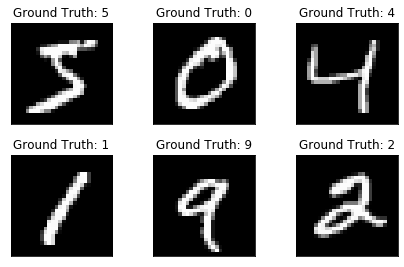

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Flattens out the 28 * 28 image array of image pixels
X_train_flat = X_train.reshape(X_train.shape[0], 28 * 28)
X_test_flat = X_test.reshape(X_test.shape[0], 28 * 28)

# we have our y_train and y_test from above

In [16]:
log = LogisticRegression()
log.fit(X_train_flat, y_train)
log.score(X_test_flat, y_test)

log.predict(X_test_flat) # predicted values
y_test # actual values


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# Models We've Already Seen
- - - 

**Warning:** The training time for all od the models is going to be  a lititle bit slow

### Reshaping the Data (part 1)

In [0]:
# Flattens out the 28 * 28 image array of image pixels
X_train_flat = X_train.reshape(X_train.shape[0], 28 * 28)
X_test_flat = X_test.reshape(X_test.shape[0], 28 * 28)

## Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log = LogisticRegression()
log.fit(X_train_flat, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(log.score(X_train_flat, y_train))
print(log.score(X_test_flat, y_test))

0.92785
0.9201


## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_flat, y_train)

KeyboardInterrupt: ignored

In [0]:
print(dec_tree.score(X_train_flat, y_train))
print(dec_tree.score(X_test_flat, y_test))

1.0
0.8781


## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
forest = RandomForestClassifier()
forest.fit(X_train_flat, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
print(forest.score(X_train_flat, y_train))
print(forest.score(X_test_flat, y_test))

0.9994
0.9475


### So What? 
We see that bot the DecisionTree and RandomForest were able to perform extremely well. The Random Forest model got an accuracy on the test set of almost 95%! This shows how powerful the models we've already learned are for real world tasks like this. It also makes you wonder just how much power a Neural Network has if it's able to top this.  

# Building a Convolutional Neural Network
- - - 

In [0]:
# Imports for the model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [0]:
# Constants we'll use from now on
batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

### Reshaping the Data (part 2)

In [19]:
X_train.shape

(60000, 28, 28)

In [0]:
# Putting the data into the proper shape for Keras to work with it
X_train_conv = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_conv = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [21]:
X_train_conv.shape

(60000, 28, 28, 1)

60,000 samples of 28x28 matrices with 1 number in each entry of the matrix (Keras requires how many numbers are in each entry. For example, an RGB-based image will have 3 numbers in each entry.)

In [22]:
X_train_conv[0].shape

(28, 28, 1)

In [23]:
X_train_conv[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [0]:
# convert class vectors to binary class matrices (essentially One Hot Encoding)
y_train_conv = keras.utils.to_categorical(y_train, num_classes)
y_test_conv = keras.utils.to_categorical(y_test, num_classes)

In [25]:
print(y_train[1])
print(y_train_conv[1])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Making the Model 

Parts:
- Sequential: States the model will be built layer by layer
- Conv2D: A 2D convolution layer. 
  - kernel_size: the (width, height) of the convolution window
  - activation: relu = rectified linear unit
  - input_shape: Shape of data coming into this layer
- Conv2D: Same as before
- MaxPooling2D: Brings together outputs of previous layers into one node
- DropOut: input is rate. This layer doesn't consider 0.25 of the weights
  - Helps prevent overfitting
- Flatten: flattens the inputs down to one dimension
- Dense: input is units which is the number of outputs. 
  - Connects every input to this layer to every output of this layer (in our case 128 outputs)
- Dropout: Same as above
- Dense: Final layer that maps each input with a weight to an output of one of the 10 possible output classes

## But, 
We don't really have to worry about all of that. We just want a general understanding so that we can find answers using experimentation or by building on what other people have done. 

First, let's try the neural network in 3blue1brown's video. It uses 3 "Dense" layers, which just means there is a connection between every neuron in the previous layer and every neuron in the current layer.

The main problem: we lose the 2D structure of the images since the "Dense" layers are 1 dimensional.

In [26]:
# we have to use the "flattened" images like we did with the decision tree, logistic regression, etc.
X_train_flat.shape

(60000, 784)

60,000 images represented as 784-element vectors

In [27]:
model = Sequential()
model.add(Dense(16, input_shape=(784,), activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
# sigmoid is that logistic function we talked about!

Here we are defining how the model will be trained. The loss function and optimizer tell our model how it will seek to improve with each iteration. The metric is what we will score our model using. 

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(X_train_flat, y_train_conv, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_flat, y_test_conv))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 7s 125us/step - loss: 1.7844 - acc: 0.5396 - val_loss: 1.0884 - val_acc: 0.7658
Epoch 2/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.8031 - acc: 0.8233 - val_loss: 0.6006 - val_acc: 0.8763
Epoch 3/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.5153 - acc: 0.8814 - val_loss: 0.4268 - val_acc: 0.8996
Epoch 4/12
60000/60000 [==============================] - 2s 42us/step - loss: 0.3958 - acc: 0.9009 - val_loss: 0.3494 - val_acc: 0.9124
Epoch 5/12
60000/60000 [==============================] - 3s 42us/step - loss: 0.3376 - acc: 0.9110 - val_loss: 0.3111 - val_acc: 0.9173
Epoch 6/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.3039 - acc: 0.9182 - val_loss: 0.2834 - val_acc: 0.9239
Epoch 7/12
60000/60000 

Next, we'll try an arbitrary model.

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Flatten()) # turn 2D layer into 1D layer
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(X_train_conv, y_train_conv, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_conv, y_test_conv))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.2628 - acc: 0.9209 - val_loss: 0.0978 - val_acc: 0.9693
Epoch 2/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0816 - acc: 0.9764 - val_loss: 0.0625 - val_acc: 0.9808
Epoch 3/12
60000/60000 [==============================] - 5s 75us/step - loss: 0.0510 - acc: 0.9847 - val_loss: 0.0525 - val_acc: 0.9819
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0352 - acc: 0.9896 - val_loss: 0.0461 - val_acc: 0.9846
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0258 - acc: 0.9929 - val_loss: 0.0434 - val_acc: 0.9852
Epoch 6/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0190 - acc: 0.9947 - val_loss: 0.0463 - val_acc: 0.9844
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0128 - acc: 0.9965 - val_loss: 0.0434 - val_ac

Adding a 2D Layer improved the accuracy!

Finally, we will try the model with the best performance created by the people from Keras.

In [31]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(X_train_conv, y_train_conv, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test_conv, y_test_conv))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.2660 - acc: 0.9182 - val_loss: 0.0662 - val_acc: 0.9798
Epoch 2/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0873 - acc: 0.9740 - val_loss: 0.0450 - val_acc: 0.9842
Epoch 3/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0684 - acc: 0.9793 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 4/12
60000/60000 [==============================] - 9s 147us/step - loss: 0.0553 - acc: 0.9833 - val_loss: 0.0301 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0483 - acc: 0.9858 - val_loss: 0.0344 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0421 - acc: 0.9873 - val_loss: 0.0312 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0394 - acc: 0.9882 - val_loss: 0.0294 -

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

**Key Note:** (Repeated) Make sure to set Runtime type to GPU before running the following. It will speed up the running time *immensely*

Do so by going into Runtime -> Change Runtime Type -> Set Hardware Acclerator to GPU 

In [0]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

In [34]:
print('Training Accuracy: ' + str(acc))
print('Training Loss: ' + str(loss))
print('Test Accuracy: ' + str(val_acc))
print('Test Loss: ' + str(val_loss))

Training Accuracy: [0.9182166666348776, 0.9739666666348775, 0.9793333333651225, 0.9832500000317892, 0.9858333333651225, 0.9872999999682108, 0.9882, 0.9895333333651225, 0.9901333333333333, 0.9907999999682109, 0.9913666666348775, 0.9917666666984558]
Training Loss: [0.2660309991757075, 0.08725136131445567, 0.0684378015011549, 0.055270990459124245, 0.04825352272689343, 0.042073246839642524, 0.039380560872455436, 0.03522607920095325, 0.032071386392414566, 0.03026121665338675, 0.027970376177877187, 0.028335387250905234]
Test Accuracy: [0.9798, 0.9842, 0.9885, 0.9906, 0.9889, 0.9894, 0.9895, 0.9914, 0.9902, 0.991, 0.991, 0.9923]
Test Loss: [0.06622829197347165, 0.0449588726721704, 0.03394297254160047, 0.0301319099662127, 0.03440820862115361, 0.031151314751594328, 0.02943701587675605, 0.02582630753845442, 0.029203626653301763, 0.027771246253920252, 0.02725605101379333, 0.024995200224168367]


In [35]:
score = model.evaluate(X_test_conv, y_test_conv, verbose=0)
print('Test loss:', score[1])
print('Test accuracy:', score[1])

Test loss: 0.9923
Test accuracy: 0.9923


We achieved 99% accuracy, which is better than any of the other models we used! 

In [36]:
p = model.predict(np.array([X_test_conv[32]]))
print(p)
print(np.max(p))
print(np.argmax(p))


[[2.0679439e-15 2.7397796e-11 7.9559449e-11 1.0000000e+00 2.9175318e-11 3.5540680e-08 5.1773373e-15 5.9682392e-10 5.5900028e-11 1.0281020e-10]]
1.0
3


In [37]:
y_test[32]

3

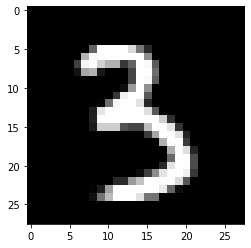

In [38]:
plt.imshow(X_test[32], cmap='gray', interpolation='none')